#Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#Exploratory data analysis

In [ ]:
data = pd.read_csv("us-counties-2022.csv")
data



,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0
...,...,...,...,...,...,...
927746,2022-10-12,Sweetwater,Wyoming,56037.0,12152,131.0
927747,2022-10-12,Teton,Wyoming,56039.0,11771,16.0
927748,2022-10-12,Uinta,Wyoming,56041.0,6163,43.0
927749,2022-10-12,Washakie,Wyoming,56043.0,2668,47.0


In [ ]:

def daily_increase(data):
    d = []
    for i in range(len(data)):
            delta = datetime.strptime(data[i], "%Y-%m-%d")-datetime.strptime(data[0], "%Y-%m-%d")

            d.append(delta.days)
    return d
data['day'] = daily_increase(data['date'])
data.head(5)


,date,county,state,fips,cases,deaths,day
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0,0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0,0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0,0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0,0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0,0


In [ ]:
over_time_data = data.groupby('day')[['cases', 'deaths']].sum()
over_time_data = over_time_data.reset_index(level=[0])
over_time_data = over_time_data.sort_values(by=['cases'], ascending=False)
over_time_data.head(5)

,day,cases,deaths
284,284,96597607,1059804.0
283,283,96523589,1059020.0
282,282,96472901,1058422.0
281,281,96448432,1058256.0
280,280,96441582,1058242.0


In [ ]:
all_states_data = data.groupby("state")[["cases", "deaths"]].sum()
all_states_data = all_states_data.reset_index(level=[0])
all_states_data = all_states_data.sort_values(by=['cases'], ascending=False)
all_states_data.head(5)

,state,cases,deaths
5,California,2737551482,25569678.0
47,Texas,1968806609,24815419.0
10,Florida,1766999809,21083537.0
34,New York,1520630391,19320572.0
15,Illinois,932568675,10720250.0


In [ ]:
over_time_data = data.groupby('day')[['cases', 'deaths']].sum()
over_time_data = over_time_data.reset_index(level=[0])
over_time_data['moving_average_cases'] = over_time_data.cases.rolling(7).mean()
over_time_data['moving_average_deaths'] = over_time_data.deaths.rolling(7).mean()
over_time_data['mortality_rate'] = over_time_data['deaths'] / over_time_data['cases']
over_time_data['moving_average_mortality_rate'] = over_time_data.mortality_rate.rolling(7).mean()
over_time_data

,day,cases,deaths,moving_average_cases,moving_average_deaths,mortality_rate,moving_average_mortality_rate
0,0,54850427,824609.0,NaN,NaN,0.015034,NaN
1,1,55137064,824841.0,NaN,NaN,0.014960,NaN
2,2,56155999,826491.0,NaN,NaN,0.014718,NaN
3,3,57041905,828853.0,NaN,NaN,0.014531,NaN
4,4,57745969,830981.0,NaN,NaN,0.014390,NaN
...,...,...,...,...,...,...,...
280,280,96441582,1058242.0,9.631938e+07,1.056930e+06,0.010973,0.010973
281,281,96448432,1058256.0,9.635995e+07,1.057350e+06,0.010972,0.010973
282,282,96472901,1058422.0,9.639717e+07,1.057753e+06,0.010971,0.010973
283,283,96523589,1059020.0,9.643649e+07,1.058174e+06,0.010972,0.010973


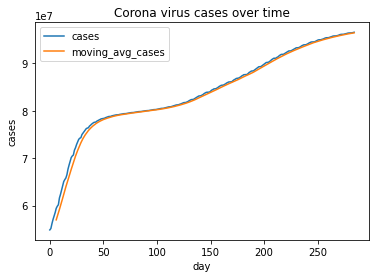

In [ ]:
plt.plot(over_time_data['day'], over_time_data['cases'] )
plt.plot(over_time_data['day'], over_time_data['moving_average_cases'])
plt.title('Corona virus cases over time')
plt.xlabel('day')
plt.ylabel('cases')
plt.legend(['cases', 'moving_avg_cases'])
plt.show()

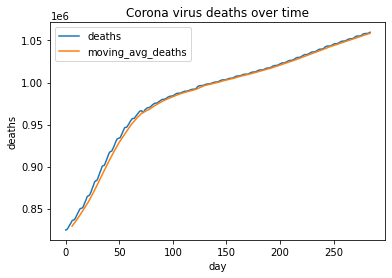

In [ ]:
plt.plot(over_time_data['day'],over_time_data['deaths'] )
plt.plot(over_time_data['day'],over_time_data['moving_average_deaths'])
plt.title('Corona virus deaths over time')
plt.xlabel('day')
plt.ylabel('deaths')
plt.legend(['deaths', 'moving_avg_deaths'])
plt.show()

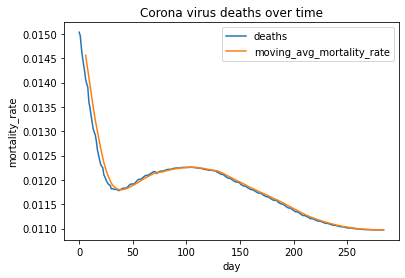

In [ ]:
plt.plot(over_time_data['day'],over_time_data['mortality_rate'] )
plt.plot(over_time_data['day'],over_time_data['moving_average_mortality_rate'])
plt.title('Corona virus deaths over time')
plt.xlabel('day')
plt.ylabel('mortality_rate')
plt.legend(['deaths', 'moving_avg_mortality_rate'])
plt.show()

In [ ]:
all_states_data = data.groupby("state")[["cases", "deaths"]].sum()
all_states_data['mortality_rate'] = all_states_data['deaths'] / all_states_data['cases']
all_states_data = all_states_data.reset_index(level=[0])
all_states_data = all_states_data.sort_values(by=['cases'], ascending=False)


In [ ]:
def state_visualization(state):
  state_data = data.loc[data['state'] == state]



  over_time_state_data = state_data.groupby('day')[['cases', 'deaths']].sum()
  over_time_state_data = over_time_state_data.reset_index(level=[0])
  over_time_state_data['moving_average_cases'] = over_time_state_data.cases.rolling(7).mean()
  over_time_state_data['moving_average_deaths'] = over_time_state_data.deaths.rolling(7).mean()
  over_time_state_data['mortality_rate'] = over_time_state_data['deaths'] / over_time_state_data['cases']
  over_time_state_data['moving_average_mortality_rate'] = over_time_state_data.mortality_rate.rolling(7).mean()
  print()
  print("Plots for state : " + state)
  print()


  plt.plot(over_time_state_data['day'], over_time_state_data['cases'] )
  plt.plot(over_time_state_data['day'], over_time_state_data['moving_average_cases'])
  plt.title('Corona virus cases over time in ' + state)
  plt.xlabel('Days since 1/1/2022')
  plt.ylabel('Cases')
  plt.legend(['cases', 'moving_avg_cases'])
  plt.show()
  print()

  plt.plot(over_time_state_data['day'],over_time_state_data['deaths'] )
  plt.plot(over_time_state_data['day'],over_time_state_data['moving_average_deaths'])
  plt.title('Corona virus deaths over time in ' + state)
  plt.xlabel('Days since 1/1/2022')
  plt.ylabel('Deaths')
  plt.legend(['deaths', 'moving_avg_deaths'])
  plt.show()
  print()

  plt.plot(over_time_state_data['day'],over_time_state_data['mortality_rate'] )
  plt.plot(over_time_state_data['day'],over_time_state_data['moving_average_mortality_rate'])
  plt.title('Corona virus deaths over time in ' + state)
  plt.xlabel('Days since 1/1/2022')
  plt.ylabel('Mortality_rate')
  plt.legend(['mortality_rate' , 'mortality_ratemoving_avg_mortality_rate'])
  plt.show()
  print()



In [ ]:
states = ['California', 'Texas', 'Florida', 'New York', 'Illinois']
for state in states:
  state_visualization(state)

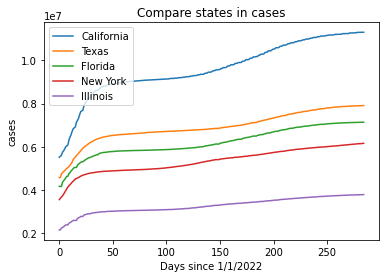

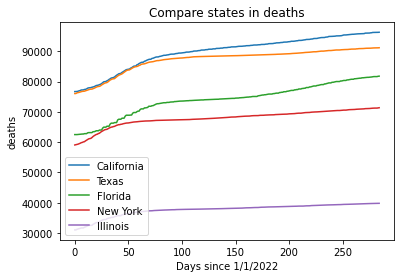

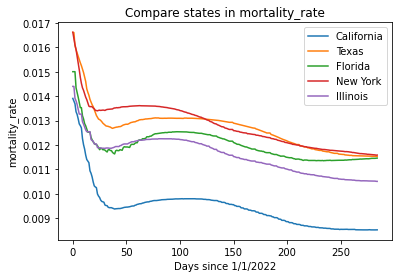

In [ ]:
compare_states = ['California', 'Texas', 'Florida', 'New York', 'Illinois']
graph_name = ['cases', 'deaths', 'mortality_rate']

for num in range(3):
  for state in compare_states:
    state_data = data.loc[data['state'] == state]
    state_data = state_data.groupby('day')[['cases', 'deaths']].sum()
    state_data = state_data.reset_index(level=[0])
    state_data['mortality_rate'] = state_data['deaths'] / state_data['cases']
    plt.plot(state_data['day'], state_data[graph_name[num]])
  plt.legend(compare_states)
  plt.xlabel('Days since 1/1/2022')
  plt.ylabel(graph_name[num])
  plt.title("Compare states in " + graph_name[num])
  plt.show()
  print()



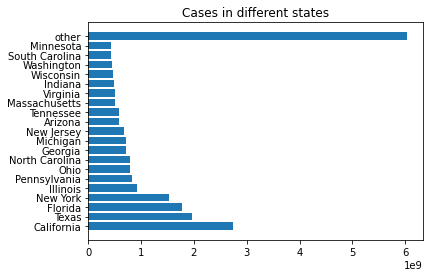

In [ ]:

temp1_bar_plot_data = all_states_data[:20]
temp2_bar_plot_data = all_states_data[20:]
temp2_bar_plot_data = temp2_bar_plot_data.agg(['sum'])
temp2_bar_plot_data['state'] = 'other'
bar_plot_data = pd.merge(temp1_bar_plot_data, temp2_bar_plot_data, how = 'outer')
plt.barh(bar_plot_data['state'], bar_plot_data['cases'])
plt.title('Cases in different states')
plt.show()

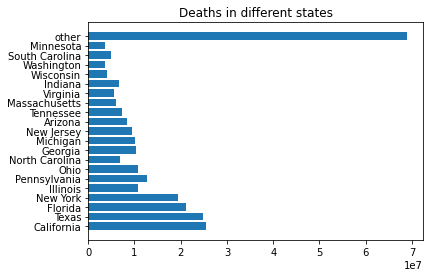

In [ ]:
plt.barh(bar_plot_data['state'], bar_plot_data['deaths'])
plt.title('Deaths in different states')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1218: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


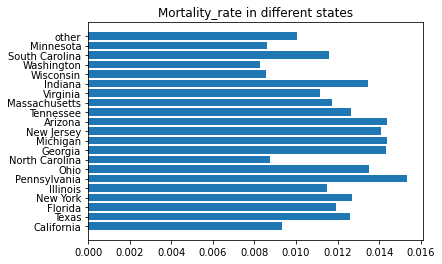

In [ ]:
temp1_bar_plot_data = all_states_data[:20]
temp2_bar_plot_data = all_states_data[20:]
temp2_bar_plot_data = temp2_bar_plot_data.agg(['mean'])
temp2_bar_plot_data['state'] = 'other'

bar_plot_data = pd.merge(temp1_bar_plot_data, temp2_bar_plot_data, how = 'outer')
plt.barh(bar_plot_data['state'], bar_plot_data['mortality_rate'])
plt.title('Mortality_rate in different states')
plt.show()

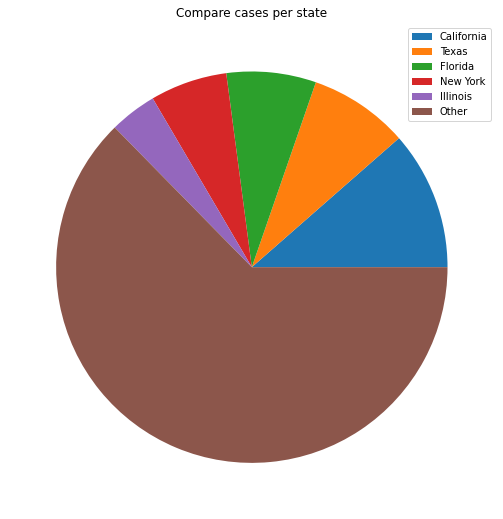

In [ ]:
pie_states = states
pie_states.append("Other")
temp1_bar_plot_data = all_states_data[:5]
temp2_bar_plot_data = all_states_data[5:]
temp2_bar_plot_data = temp2_bar_plot_data.agg(['sum'])
temp2_bar_plot_data['state'] = 'other'
bar_plot_data = pd.merge(temp1_bar_plot_data, temp2_bar_plot_data, how = 'outer')
plt.figure(figsize=(12,9))
plt.pie(bar_plot_data['cases'])
plt.title("Compare cases per state")
plt.legend(states, loc='best')
plt.show()

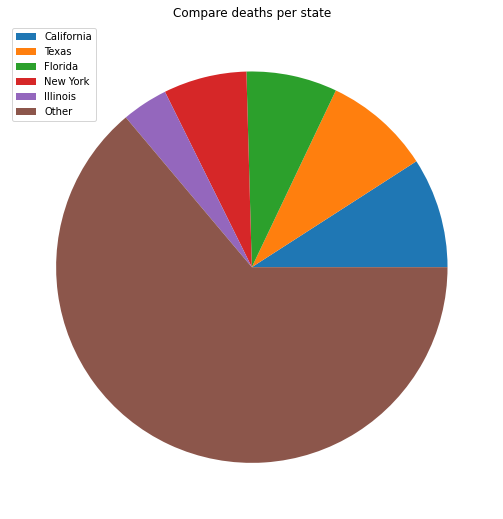

In [ ]:
pie_states = states
pie_states.append("Other")
temp1_bar_plot_data = all_states_data[:5]
temp2_bar_plot_data = all_states_data[5:]
temp2_bar_plot_data = temp2_bar_plot_data.agg(['sum'])
temp2_bar_plot_data['state'] = 'other'
bar_plot_data = pd.merge(temp1_bar_plot_data, temp2_bar_plot_data, how = 'outer')
plt.figure(figsize=(12,9))
plt.pie(bar_plot_data['deaths'])
plt.title("Compare deaths per state")
plt.legend(states, loc='best')
plt.show()